In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
insurance = pd.read_csv("insurance.csv")
i = insurance.copy()
i


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [45]:
i.describe().T #istatiksel verilerini görebilmek için describe fonk. kullanıldı

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [46]:
i.isna() # Null değer olmadığını doğrulamak için isna fonksiyonu kullanıldı

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [47]:
i.info() # Column değişkenlerimizi daha efektif kullanmak için info komutu ile incelendi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [48]:
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(i, *['bmi'], **{})
chart #There can be seen most of the Bmi values gathered around 30's


In [49]:
print(i['bmi'].mean())
print(i['bmi'].max())
print(i['bmi'].min())

30.66339686098655
53.13
15.96


In [50]:
grouped_s=i.groupby(i['smoker']=='yes')

smoker_charge=grouped_s.get_group(True) #we get the dataset with only smoker
nonsmoker_charge=grouped_s.get_group(False) # and getting the dataset with non-smoker

smoker_m=smoker_charge['charges'].mean() #then we get the mean values
nonsmoker_m=nonsmoker_charge['charges'].mean()

print(smoker_m)
print(nonsmoker_m)


32050.23183153284
8434.268297856204


<Axes: xlabel='smoker', ylabel='charges'>

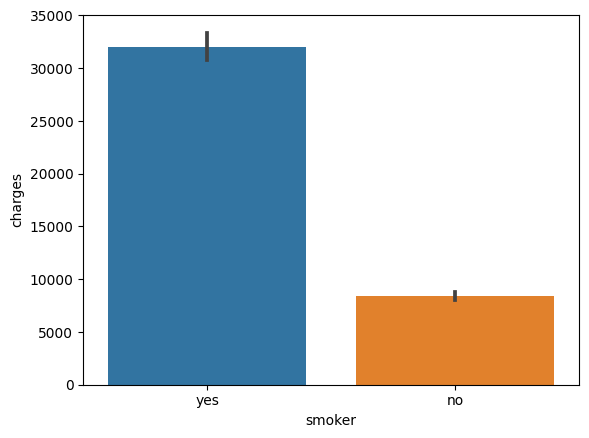

In [51]:
plt.figure()
sns.barplot(x='smoker', y='charges', data=i)


#Examining the relationship between smoker and charges.
#Smokers' charges approximately four times higher than non-smokers'.

In [52]:
i['region'].value_counts(normalize=True) #we can use normalize feature to getting idea of size of regions

southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64

<Axes: xlabel='region,smoker'>

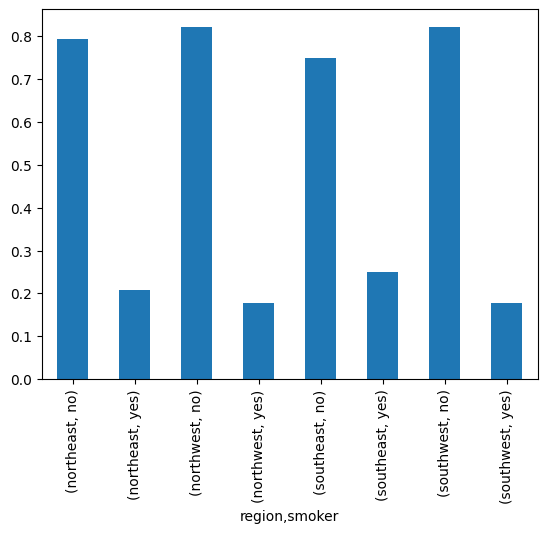

In [53]:
plt.figure
i.groupby('region')['smoker'].value_counts(normalize=True).plot.bar()
#Then we classified the regions with usage of smoke.
#There is no connection between region and smoke usage since there is no significant difference.

<Axes: xlabel='sex'>

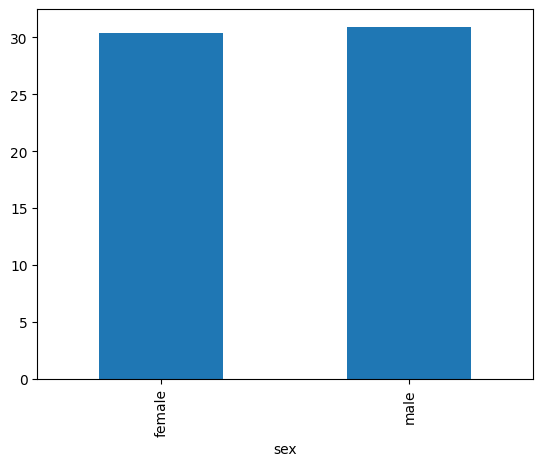

In [54]:
i.groupby('sex')['bmi'].mean().plot.bar()
#with shorter code we get plot for relation between sex and bmi.
#There is no connection between sex and bmi usage since there is no significant difference.

<Axes: xlabel='region'>

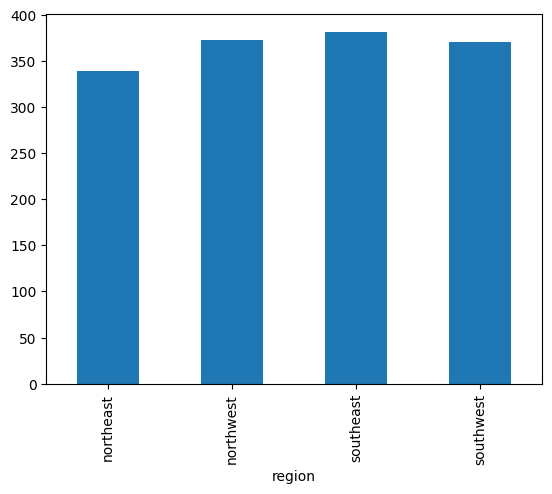

In [55]:
i.groupby('region')['children'].sum().plot.bar()
#Most children in southeast but not much difference according to other region.

<Axes: xlabel='age', ylabel='bmi'>

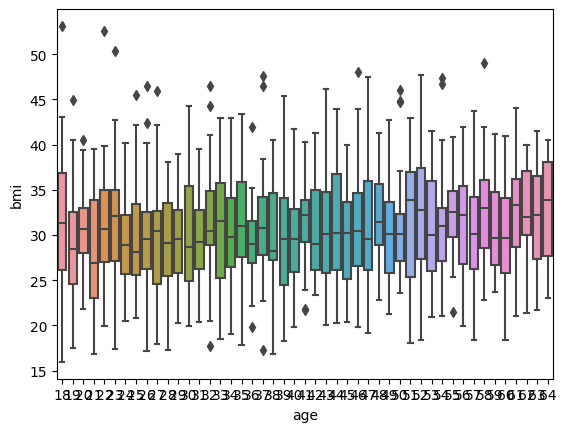

In [56]:
sns.boxplot(x='age',y='bmi',data=i)
#We evaluate that weighted Bmi value around 30 for all ages.

<Axes: xlabel='children'>

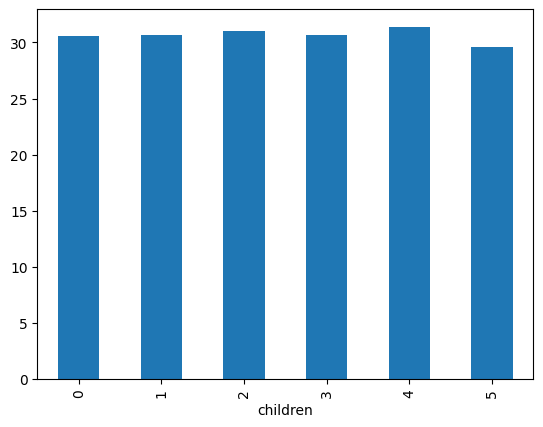

In [57]:
i.groupby('children')['bmi'].mean().plot.bar()
#with shorter code we get plot for relation between children and bmi.
#There is no connection between children and bmi usage since there is no significant difference.

<Axes: xlabel='bmi'>

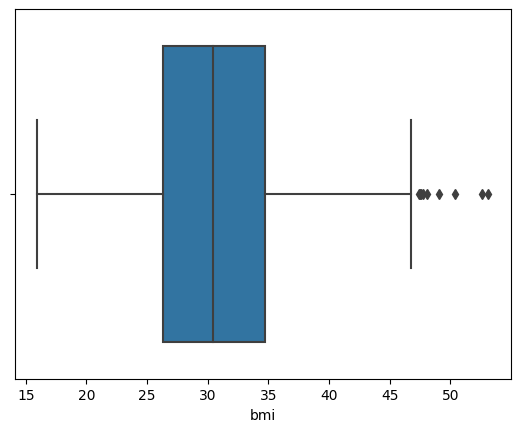

In [58]:
sns.boxplot(x='bmi',data=i)
#There are few outliers.

<Axes: xlabel='bins'>

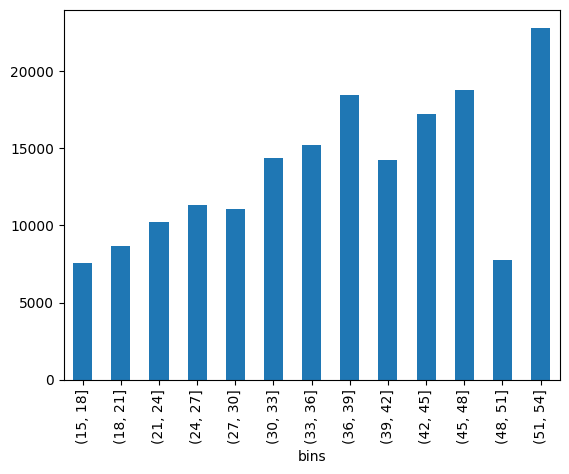

In [59]:
j=i.copy()
j['bins']= pd.cut(x=i['bmi'],bins=np.arange(15, 55,3))
j.groupby('bins')['charges'].mean().plot.bar()
#In this plot we have seen that person with lower Bmi has low charges and person with higher Bmi has higher charges.bmi and charges has linear relationship.
#Of course there is some exception but "Exceptions do NOT break rules!"

<Axes: xlabel='region', ylabel='bmi'>

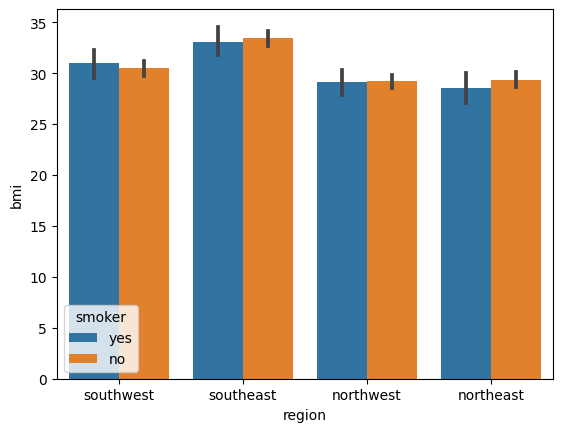

In [60]:
sns.barplot(x='region', y='bmi', hue='smoker', data=i)
#Average bmi value from southeast little higher than other regions's values.
#The state of using smoke does not significantly influence both bmi and region.

In [67]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVR

In [76]:
# label encoding

def label_encoding(column_name):
  label_encoder = LabelEncoder()
  i[column_name] = label_encoder.fit_transform(i[column_name])

In [77]:
label_encoding("smoker")
label_encoding("sex")

In [79]:
i.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [83]:
#one-hot encoding

one_hot = pd.get_dummies(i["region"])
one_hot.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [84]:
i = pd.concat([i, one_hot], axis=1)
i.drop("region", axis=1, inplace=True)
i.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [86]:
X = i.drop("charges", axis=1)
y = i["charges"]

In [89]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X[0:5]

array([[0.02173913, 0.        , 0.3212268 , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.47914985, 0.2       , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.2173913 , 1.        , 0.45843422, 0.6       , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.32608696, 1.        , 0.18146355, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ],
       [0.30434783, 1.        , 0.34759214, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ]])

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [91]:
X_train.shape

(1070, 9)

In [92]:
y_train.shape

(1070,)

In [93]:
X_test.shape

(268, 9)

In [94]:
y_test.shape

(268,)

In [95]:
#model selection

linreg = LinearRegression()
DecTree = DecisionTreeRegressor()
Rand_forest = RandomForestRegressor()
SVM = SVR()

In [96]:
linreg_scores = cross_val_score(linreg,
                                X_train, y_train,
                                scoring="neg_mean_squared_error",
                                cv=10)

In [97]:
linreg_scores

array([-36875998.62836598, -43307871.90469339, -27392943.335941  ,
       -36545076.53517248, -34064321.21101744, -37545462.85261904,
       -52992268.32309429, -39706839.29685257, -38357145.09175086,
       -32042446.75311643])

In [98]:
DecTree_scores = cross_val_score(DecTree,
                                 X_train, y_train,
                                 scoring="neg_mean_squared_error",
                                 cv=10)

In [99]:
Rand_forest_scores =cross_val_score(Rand_forest,
                                    X_train, y_train,
                                    scoring="neg_mean_squared_error",
                                    cv=10)

In [100]:
svm_scores = cross_val_score(SVM,
                             X_train, y_train,
                             scoring="neg_mean_squared_error",
                             cv=10)

In [101]:
def score_display(scores):
  scores = np.sqrt(-scores)
  print(f"""
  RMSE Scores:{scores},
  Mean: {scores.mean()},
  Standart Deviation: {scores.std()}
        """)

In [102]:
score_display(linreg_scores)


  RMSE Scores:[6072.56112595 6580.87166754 5233.82683473 6045.25239632 5836.4647871
 6127.43525895 7279.57885616 6301.33631041 6193.3145481  5660.60480453],
  Mean: 6133.124658979258,
  Standart Deviation: 517.5126188634559
        


In [103]:
score_display(DecTree_scores)


  RMSE Scores:[6285.29986639 6628.14871529 7037.24559068 7077.23368979 7191.96250872
 5743.53819276 7580.50184983 6156.65389382 6800.20054498 5478.13362822],
  Mean: 6597.891848049427,
  Standart Deviation: 637.1240289907173
        


In [115]:
params = {"n_estimators": [3, 10, 20, 50],
          "n_jobs": [2, 3, 4, 10]}

In [116]:
grid_s = GridSearchCV(Rand_forest, params, cv=5, scoring="neg_mean_squared_error")

In [117]:
grid_s.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [3, 10, 20, 50],
                         'n_jobs': [2, 3, 4, 10]},
             scoring='neg_mean_squared_error')

In [118]:
grid_s.best_params_

{'n_estimators': 50, 'n_jobs': 4}

In [119]:
for mean_score, params in zip((grid_s.cv_results_["mean_test_score"]), grid_s.cv_results_["params"]):
  print(np.sqrt(-mean_score), "-------------", params)

5573.236474532251 ------------- {'n_estimators': 3, 'n_jobs': 2}
5526.826664068873 ------------- {'n_estimators': 3, 'n_jobs': 3}
5747.521134771064 ------------- {'n_estimators': 3, 'n_jobs': 4}
5633.767081585165 ------------- {'n_estimators': 3, 'n_jobs': 10}
5125.87892706149 ------------- {'n_estimators': 10, 'n_jobs': 2}
5078.31682044556 ------------- {'n_estimators': 10, 'n_jobs': 3}
5101.961876352036 ------------- {'n_estimators': 10, 'n_jobs': 4}
5201.147183063525 ------------- {'n_estimators': 10, 'n_jobs': 10}
5032.631302614335 ------------- {'n_estimators': 20, 'n_jobs': 2}
5107.0761710391735 ------------- {'n_estimators': 20, 'n_jobs': 3}
4988.7934380649895 ------------- {'n_estimators': 20, 'n_jobs': 4}
5057.725291635651 ------------- {'n_estimators': 20, 'n_jobs': 10}
4973.166548499168 ------------- {'n_estimators': 50, 'n_jobs': 2}
4955.896948214009 ------------- {'n_estimators': 50, 'n_jobs': 3}
4918.355722236236 ------------- {'n_estimators': 50, 'n_jobs': 4}
4922.262229

In [120]:
prediction = grid_s.best_estimator_.predict(X_test)

In [121]:
y_test[0:10].values

array([ 9095.06825,  5272.1758 , 29330.98315,  9301.89355, 33750.2918 ,
        4536.259  ,  2117.33885, 14210.53595,  3732.6251 , 10264.4421 ])

In [122]:
comparison = pd.DataFrame({"Y Test": y_test[0:10].values,
                           "Predictions": prediction[0:10]})

In [123]:
comparison

,Y Test,Predictions
0,9095.06825,10310.546515
1,5272.17580,5052.005430
2,29330.98315,28150.399855
3,9301.89355,11185.866706
4,33750.29180,34669.237239
5,4536.25900,8644.408223
6,2117.33885,2135.305769
7,14210.53595,14100.768734
8,3732.62510,5758.172879
9,10264.44210,11964.676130


In [127]:
def regression_evaluation(preds):
  mse = mean_squared_error(y_test, preds)
  rmse = np.sqrt(mse)
  r_squared = r2_score(y_test, preds)
  mae = mean_absolute_error(y_test, preds)

  print(f"Mean Absolute Error: {mae} \nMean Squared Error: {mse} \nRoot Mean Squared Error: {rmse} \nR-Squared Value: {r_squared}")

In [128]:
regression_evaluation(prediction)

Mean Absolute Error: 2536.0239724608828 
Mean Squared Error: 21034089.37890557 
Root Mean Squared Error: 4586.293642900067 
R-Squared Value: 0.8645136151723072


In [130]:
from scipy import stats

confidence = 0.95

squared_errors = (prediction - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([3652.45724471, 5359.82600775])